In [1]:
import findspark
findspark.init('/home/sdmohant/spark-3.0.0-bin-hadoop2.7')

In [2]:
import pyspark
from pyspark import SparkContext,SparkConf

In [3]:
from pyspark.sql import SparkSession

In [4]:
#spark = SparkSession.builder.appName("MyApp").getOrCreate()
#spark = SparkSession.builder.appName("MyName").getOrCreate()
conf = SparkConf().set("spark.cores.max", "16") \
    .set("spark.driver.memory", "16g") \
    .set("spark.executor.memory", "16g") \
    .set("spark.executor.memory_overhead", "16g") \
    .set("spark.driver.maxResultsSize", "0") \
    .set("spark.sql.shuffle.partitions","300")

sc = SparkContext(appName="newApp", conf=conf)
spark = SparkSession(sc)

/home/sdmohant/spark-3.0.0-bin-hadoop2.7/python/pyspark/context.py:220: DeprecationWarning: Support for Python 2 and Python 3 prior to version 3.6 is deprecated as of Spark 3.0. See also the plan for dropping Python 2 support at https://spark.apache.org/news/plan-for-dropping-python-2-support.html.
  DeprecationWarning)


In [5]:
from pyspark.sql.functions import isnan, count, col

In [6]:
df1 = spark.read.options(header = True, inferSchema = True,delimiter=',').csv("AutPapJouCSCI.csv")

In [7]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

In [14]:
df1_reordered = df1.select("PaperID","Paper_Rank","Paper_RefCnt","EstimatedCount","Journal_Rank","Journal_Cit_Cnt","CSRank","CSPaperCount","CSCitation","CIPaperCount","CIPaperCitationCnt","max_AuthorRank","min_AutPaperCount","max_AutPaperCount","min_AutCitationCount","max_AutCitationCount","min_AuthorRank","CitationCount")

In [15]:
df_pandas = df1_reordered.toPandas()

In [16]:
corr = df_pandas.corr()
corr.style.background_gradient(cmap='coolwarm')

,PaperID,Paper_Rank,Paper_RefCnt,EstimatedCount,Journal_Rank,Journal_Cit_Cnt,CSRank,CSPaperCount,CSCitation,CIPaperCount,CIPaperCitationCnt,max_AuthorRank,min_AutPaperCount,max_AutPaperCount,min_AutCitationCount,max_AutCitationCount,min_AuthorRank,CitationCount
PaperID,1,-0.0736949,0.119512,-0.00760599,-0.131732,0.0235649,-0.0333996,-0.101222,0.111322,-0.108586,-0.0670294,0.0725017,-0.0375336,0.00424526,-0.0132096,0.0356524,-0.0434735,-0.00972531
Paper_Rank,-0.0736949,1,-0.406239,-0.396268,0.438334,-0.187398,0.335935,0.042691,-0.374279,0.189026,-0.333825,0.334372,-0.0271092,-0.257798,-0.0722457,-0.35013,0.498428,-0.42882
Paper_RefCnt,0.119512,-0.406239,1,0.138281,-0.206642,0.0662986,-0.251042,-0.0360693,0.284092,-0.138384,0.143256,-0.059462,-0.0159645,0.118063,-0.000439374,0.163235,-0.241954,0.153701
EstimatedCount,-0.00760599,-0.396268,0.138281,1,-0.135198,0.0987946,-0.124897,0.0154093,0.15594,-0.0308402,0.219229,-0.255892,0.0340348,0.076352,0.127616,0.199465,-0.174519,0.989023
Journal_Rank,-0.131732,0.438334,-0.206642,-0.135198,1,-0.402358,0.218295,0.0323285,-0.39127,0.153015,-0.295299,0.190498,-0.0376746,-0.0912248,-0.0550041,-0.151373,0.258438,-0.148645
Journal_Cit_Cnt,0.0235649,-0.187398,0.0662986,0.0987946,-0.402358,1,-0.112729,0.143513,0.164705,0.0417718,0.125693,-0.0870343,0.0183075,0.0897588,0.0172994,0.0800796,-0.111496,0.100291
CSRank,-0.0333996,0.335935,-0.251042,-0.124897,0.218295,-0.112729,1,-0.441718,-0.673552,-0.235521,-0.47183,0.207025,-0.0758195,-0.192728,-0.0796065,-0.244653,0.342284,-0.13662
CSPaperCount,-0.101222,0.042691,-0.0360693,0.0154093,0.0323285,0.143513,-0.441718,1,0.457666,0.735644,0.398923,-0.106377,0.0692608,0.196422,0.0223374,0.0944252,-0.133696,0.0181688
CSCitation,0.111322,-0.374279,0.284092,0.15594,-0.39127,0.164705,-0.673552,0.457666,1,0.234709,0.703403,-0.185045,0.0406289,0.165409,0.0613191,0.249878,-0.31674,0.170494
CIPaperCount,-0.108586,0.189026,-0.138384,-0.0308402,0.153015,0.0417718,-0.235521,0.735644,0.234709,1,0.310783,0.0780367,-0.0197162,0.0349553,-0.0280049,-0.0107125,0.129594,-0.0347599


In [17]:
type(df1_reordered)

pyspark.sql.dataframe.DataFrame

In [25]:
df1_reordered.count()

82711

In [38]:
pandas_df = df1_reordered.toPandas()

In [39]:
type(pandas_df)

pandas.core.frame.DataFrame

In [40]:
pandas_df.head()

,PaperID,Paper_Rank,Paper_RefCnt,EstimatedCount,Journal_Rank,Journal_Cit_Cnt,CSRank,CSPaperCount,CSCitation,CIPaperCount,CIPaperCitationCnt,max_AuthorRank,min_AutPaperCount,max_AutPaperCount,min_AutCitationCount,max_AutCitationCount,min_AuthorRank,CitationCount
0,2090491828,23324,15,1,11312,3710,12687,5213,3898,446,395,19715,2,10,1,34,19025,1
1,2086652801,24626,0,0,12984,657,11157,2030,11139,90,183,19757,1,45,0,298,18003,0
2,2100022042,20084,1,9,9572,56355,11476,8062,62615,332,3395,18453,18,121,87,6170,13774,9
3,2108951013,20424,13,16,8790,73060,11166,3181,73620,162,1936,18229,2,128,78,2876,15444,16
4,2124023096,21822,0,2,11391,4686,12521,1758,2790,90,209,18932,14,21,13,45,18754,2


In [41]:
estimatedCount = pandas_df["EstimatedCount"]

In [42]:
estimatedCount.head()

0     1
1     0
2     9
3    16
4     2
Name: EstimatedCount, dtype: int32

In [43]:
pandas_df.count()

PaperID                 82711
Paper_Rank              82711
Paper_RefCnt            82711
EstimatedCount          82711
Journal_Rank            82711
Journal_Cit_Cnt         82711
CSRank                  82711
CSPaperCount            82711
CSCitation              82711
CIPaperCount            82711
CIPaperCitationCnt      82711
max_AuthorRank          82711
min_AutPaperCount       82711
max_AutPaperCount       82711
min_AutCitationCount    82711
max_AutCitationCount    82711
min_AuthorRank          82711
CitationCount           82711
dtype: int64

In [44]:
len(pandas_df.columns)


18

In [45]:
pandas_df.drop(['PaperID'], axis=1, inplace=True)

In [47]:
est_cnt = pandas_df.iloc[62000:, 2].values

In [48]:
act_cnt = pandas_df.iloc[62000:, 16].values

In [49]:
from sklearn import metrics

In [50]:
print('Mean Absolute Error with EstimatedCount:', metrics.mean_absolute_error(est_cnt, act_cnt))
print('Mean Squared Error with EstimatedCount:', metrics.mean_squared_error(est_cnt, act_cnt))
print('Root Mean Squared Error with EstimatedCount:', np.sqrt(metrics.mean_squared_error(est_cnt, act_cnt)))

('Mean Absolute Error with EstimatedCount:', 5.341654193423785)
('Mean Squared Error with EstimatedCount:', 1194.049876877022)
('Root Mean Squared Error with EstimatedCount:', 34.555026796068645)


In [51]:
len(pandas_df.columns)


17

In [52]:
pandas_df.drop(['EstimatedCount'], axis=1, inplace=True)

In [54]:
X_train = pandas_df.iloc[0:62000, 0:15].values
y_train = pandas_df.iloc[:62000, 15].values

In [55]:
X_test = pandas_df.iloc[62000:, 0:15].values
y_test = pandas_df.iloc[62000:, 15].values

In [56]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/home/sdmohant/.virtualenvs/datascience/local/lib/python2.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [57]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [58]:
y_pred = regressor.predict(X_test)

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
type(y_pred)

numpy.ndarray

In [61]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

('Mean Absolute Error:', 3.9083844333928823)
('Mean Squared Error:', 355.50094720196995)
('Root Mean Squared Error:', 18.85473275339563)


In [62]:
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
featureslist=pandas_df.columns

In [64]:
importances = regressor.feature_importances_

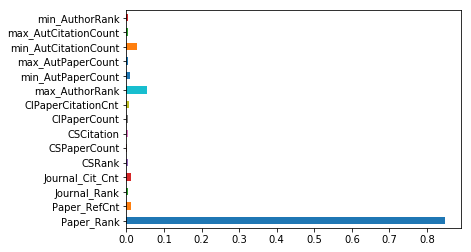

In [66]:
(pd.Series(importances, index=featureslist[0:15]).plot(kind='barh')) 

In [67]:
import xgboost as xgb

In [69]:
regressor = xgb.XGBRegressor(
                n_estimators=100,
                reg_lambda=1,
                gamma=0,
                max_depth=40
                )
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print('Mean Absolute Error of XGBoost Kfold:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error of XGBoost Kfold:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error of XGBoost Kfold:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

('Mean Absolute Error of XGBoost Kfold:', 3.8862256361863654)
('Mean Squared Error of XGBoost Kfold:', 411.9995027630341)
('Root Mean Squared Error of XGBoost Kfold:', 20.297770881627226)


In [70]:
importances = regressor.feature_importances_

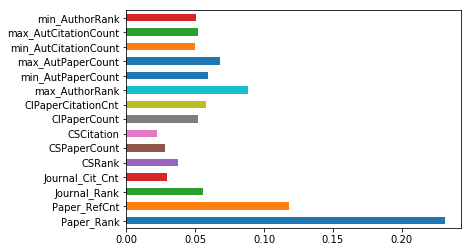

In [71]:
(pd.Series(importances, index=featureslist[0:15]).plot(kind='barh')) 

In [28]:
y_estimatedcnt = estimatedCount.iloc[62000:].values

In [72]:
pandas_df.count()

Paper_Rank              82711
Paper_RefCnt            82711
Journal_Rank            82711
Journal_Cit_Cnt         82711
CSRank                  82711
CSPaperCount            82711
CSCitation              82711
CIPaperCount            82711
CIPaperCitationCnt      82711
max_AuthorRank          82711
min_AutPaperCount       82711
max_AutPaperCount       82711
min_AutCitationCount    82711
max_AutCitationCount    82711
min_AuthorRank          82711
CitationCount           82711
dtype: int64

In [30]:
print('Mean Absolute Error with EstimatedCount:', metrics.mean_absolute_error(y_estimatedcnt, y_pred))
print('Mean Squared Error with EstimatedCount:', metrics.mean_squared_error(y_estimatedcnt, y_pred))
print('Root Mean Squared Error with EstimatedCount:', np.sqrt(metrics.mean_squared_error(y_estimatedcnt, y_pred)))

('Mean Absolute Error with EstimatedCount:', 7.661443194437738)
('Mean Squared Error with EstimatedCount:', 1849.8860198686689)
('Root Mean Squared Error with EstimatedCount:', 43.01030132269093)


In [32]:
df1 = df1.toPandas()

In [38]:
type(df1["CitationCount"])

pandas.core.series.Series

In [41]:
#act_citation_array = df1["CitationCount"].to_numpy()
#est_citation_array = df1["EstimatedCount"].to_numpy()

In [40]:
y_est = np.array(df1["EstimatedCount"])
y_act = np.array(df1["CitationCount"])

In [43]:
print('Mean Absolute Error with EstimatedCount:', metrics.mean_absolute_error(y_act, y_est))
print('Mean Squared Error with EstimatedCount:', metrics.mean_squared_error(y_act, y_est))
print('Root Mean Squared Error with EstimatedCount:', np.sqrt(metrics.mean_squared_error(y_act, y_est)))

('Mean Absolute Error with EstimatedCount:', 5.640531489161055)
('Mean Squared Error with EstimatedCount:', 1539.6877561630254)
('Root Mean Squared Error with EstimatedCount:', 39.238855184154204)
